<a href="https://colab.research.google.com/github/Benzin4/computer_math_hw/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [174]:
API_KEY = "a99850b2826eb5810f4aabeaf47e8c2d"

## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

In [175]:
pip install requests pandas plotly scikit-learn

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [176]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "a99850b2826eb5810f4aabeaf47e8c2d"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


In [177]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-05-20 00:00:00,14.15,84,clear sky
1,Paris,FR,48.858890,2.320041,2024-05-20 03:00:00,13.46,88,clear sky
2,Paris,FR,48.858890,2.320041,2024-05-20 06:00:00,13.34,88,scattered clouds
3,Paris,FR,48.858890,2.320041,2024-05-20 09:00:00,18.14,63,broken clouds
4,Paris,FR,48.858890,2.320041,2024-05-20 12:00:00,21.92,45,overcast clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-05-24 09:00:00,19.62,29,clear sky
116,Moscow,RU,55.750446,37.617494,2024-05-24 12:00:00,21.05,27,clear sky
117,Moscow,RU,55.750446,37.617494,2024-05-24 15:00:00,20.32,32,few clouds
118,Moscow,RU,55.750446,37.617494,2024-05-24 18:00:00,16.35,48,few clouds


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [99]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика


In [178]:
import requests
import pandas as pd
import plotly.express as px

# Замените на свой API ключ OpenWeatherMap
API_KEY = "a99850b2826eb5810f4aabeaf47e8c2d"

# Список городов и стран для запроса
locations = [
    {"city": "New York", "country": "US"}, {"city": "Moscow", "country": "Russia"}, {"city": "Beijing", "country": "China"},
     {"city": "Paris", "country": "France"}
    # Добавьте другие города и страны по вашему выбору
]

# Запрос данных о погоде
weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,  # Кельвины в Цельсии
    })

# Создание DataFrame
df = pd.DataFrame(weather_data)

# Визуализация на тематической карте
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
)

fig.show()


# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

In [197]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

API_KEY = "45c86faba28a47ef069c40fdea8bd225"  # Ключ API для доступа к данным OpenWeatherMap
locations = ["Ulaanbaatar,MN", "Moscow,RU", "Paris,FR", "New York,US"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

for location in locations:
    city, country = location.split(',')
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()
    if geocode_response:
        latitude = geocode_response[0]['lat']
        longitude = geocode_response[0]['lon']
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        for entry in forecast_data:
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "feels_like": entry["main"]["feels_like"] - 273.15, # Температура по ощущению (с преобразованием)
                "temp_min": entry["main"]["temp_min"] - 273.15, # Минимальная температура (с преобразованием)
                "temp_max": entry["main"]["temp_max"] - 273.15, # Максимальная температура (с преобразованием)
                "pressure": entry["main"]["pressure"],  # Давление
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
weather_data

,city,country,latitude,longitude,datetime,temperature,feels_like,temp_min,temp_max,pressure,humidity,description
0,Ulaanbaatar,MN,47.918468,106.917702,2024-05-20 00:00:00,14.98,13.47,14.98,16.72,1012,36,light rain
1,Ulaanbaatar,MN,47.918468,106.917702,2024-05-20 03:00:00,17.43,16.09,17.43,22.33,1011,33,scattered clouds
2,Ulaanbaatar,MN,47.918468,106.917702,2024-05-20 06:00:00,21.71,20.56,21.71,25.08,1009,24,scattered clouds
3,Ulaanbaatar,MN,47.918468,106.917702,2024-05-20 09:00:00,23.99,22.99,23.99,23.99,1008,21,clear sky
4,Ulaanbaatar,MN,47.918468,106.917702,2024-05-20 12:00:00,19.26,18.13,19.26,19.26,1011,34,clear sky
...,...,...,...,...,...,...,...,...,...,...,...,...
155,New York,US,40.712728,-74.006015,2024-05-24 09:00:00,16.55,15.64,16.55,16.55,1014,53,clear sky
156,New York,US,40.712728,-74.006015,2024-05-24 12:00:00,17.45,16.58,17.45,17.45,1015,51,clear sky
157,New York,US,40.712728,-74.006015,2024-05-24 15:00:00,21.32,20.53,21.32,21.32,1015,39,clear sky
158,New York,US,40.712728,-74.006015,2024-05-24 18:00:00,24.46,23.67,24.46,24.46,1014,27,clear sky


### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

In [185]:
average_temp = weather_data['temperature'].mean()
std_temp = weather_data['temperature'].std()

print('Средняя температура по всем городам:', average_temp)
print('Стандартное отклонение температуры по всем городам:', std_temp)

Средняя температура по всем городам: 17.810000000000024
Стандартное отклонение температуры по всем городам: 4.147244909109474


### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

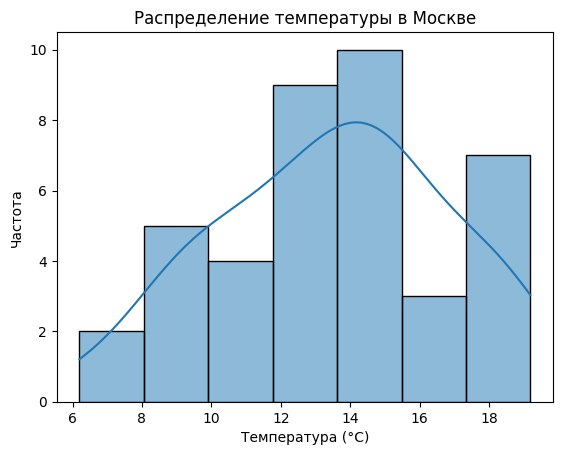

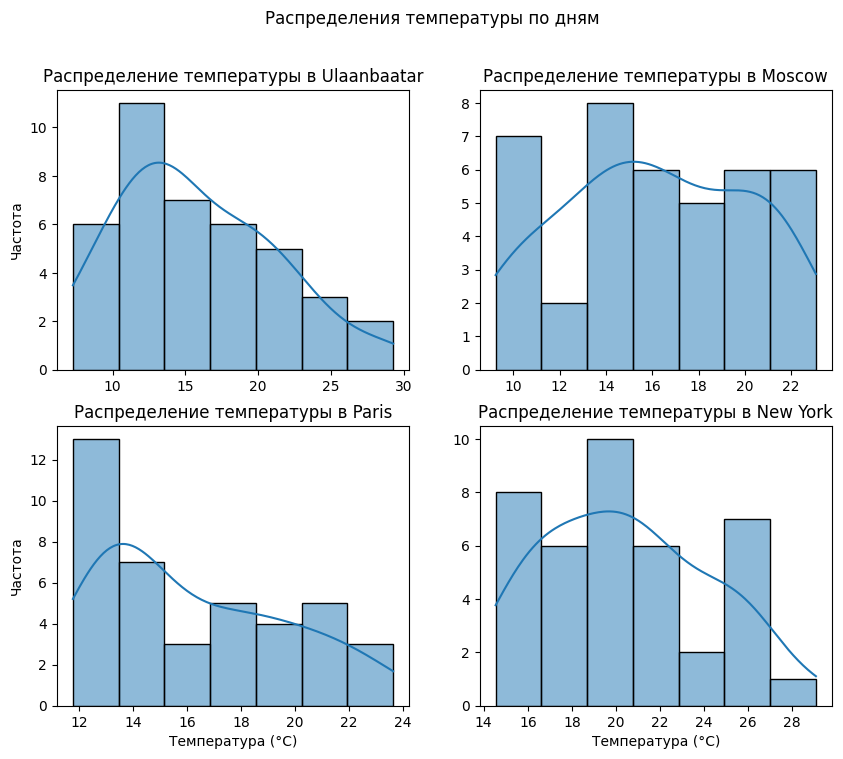

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Распределения температуры по дням')

sns.histplot(ax=axes[0, 0], kde=True, x=weather_data[weather_data['city'] == 'Ulaanbaatar']['temperature'])
axes[0, 0].set_title(f'Распределение температуры в Ulaanbaatar')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Частота')

sns.histplot(ax=axes[0, 1], kde=True, x=weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[0, 1].set_title(f'Распределение температуры в Moscow')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

sns.histplot(ax=axes[1, 0], kde=True, x=weather_data[weather_data['city'] == 'Paris']['temperature'])
axes[1, 0].set_title(f'Распределение температуры в Paris')
axes[1, 0].set_xlabel('Температура (°C)')
axes[1, 0].set_ylabel('Частота')

sns.histplot(ax=axes[1, 1], kde=True, x=weather_data[weather_data['city'] == 'New York']['temperature'])
axes[1, 1].set_title(f'Распределение температуры в New York')
axes[1, 1].set_xlabel('Температура (°C)')
axes[1, 1].set_ylabel('')

plt.show()

### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

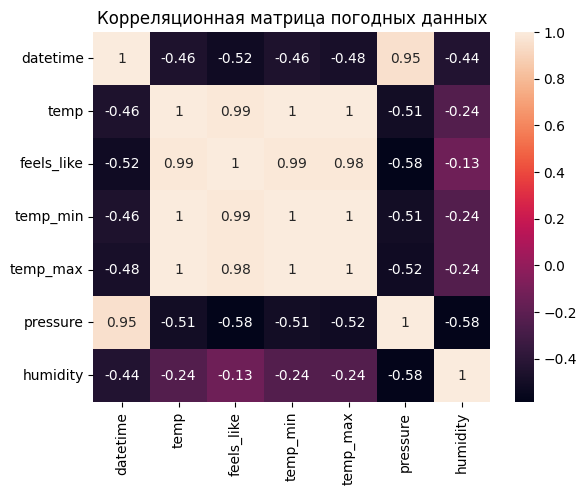

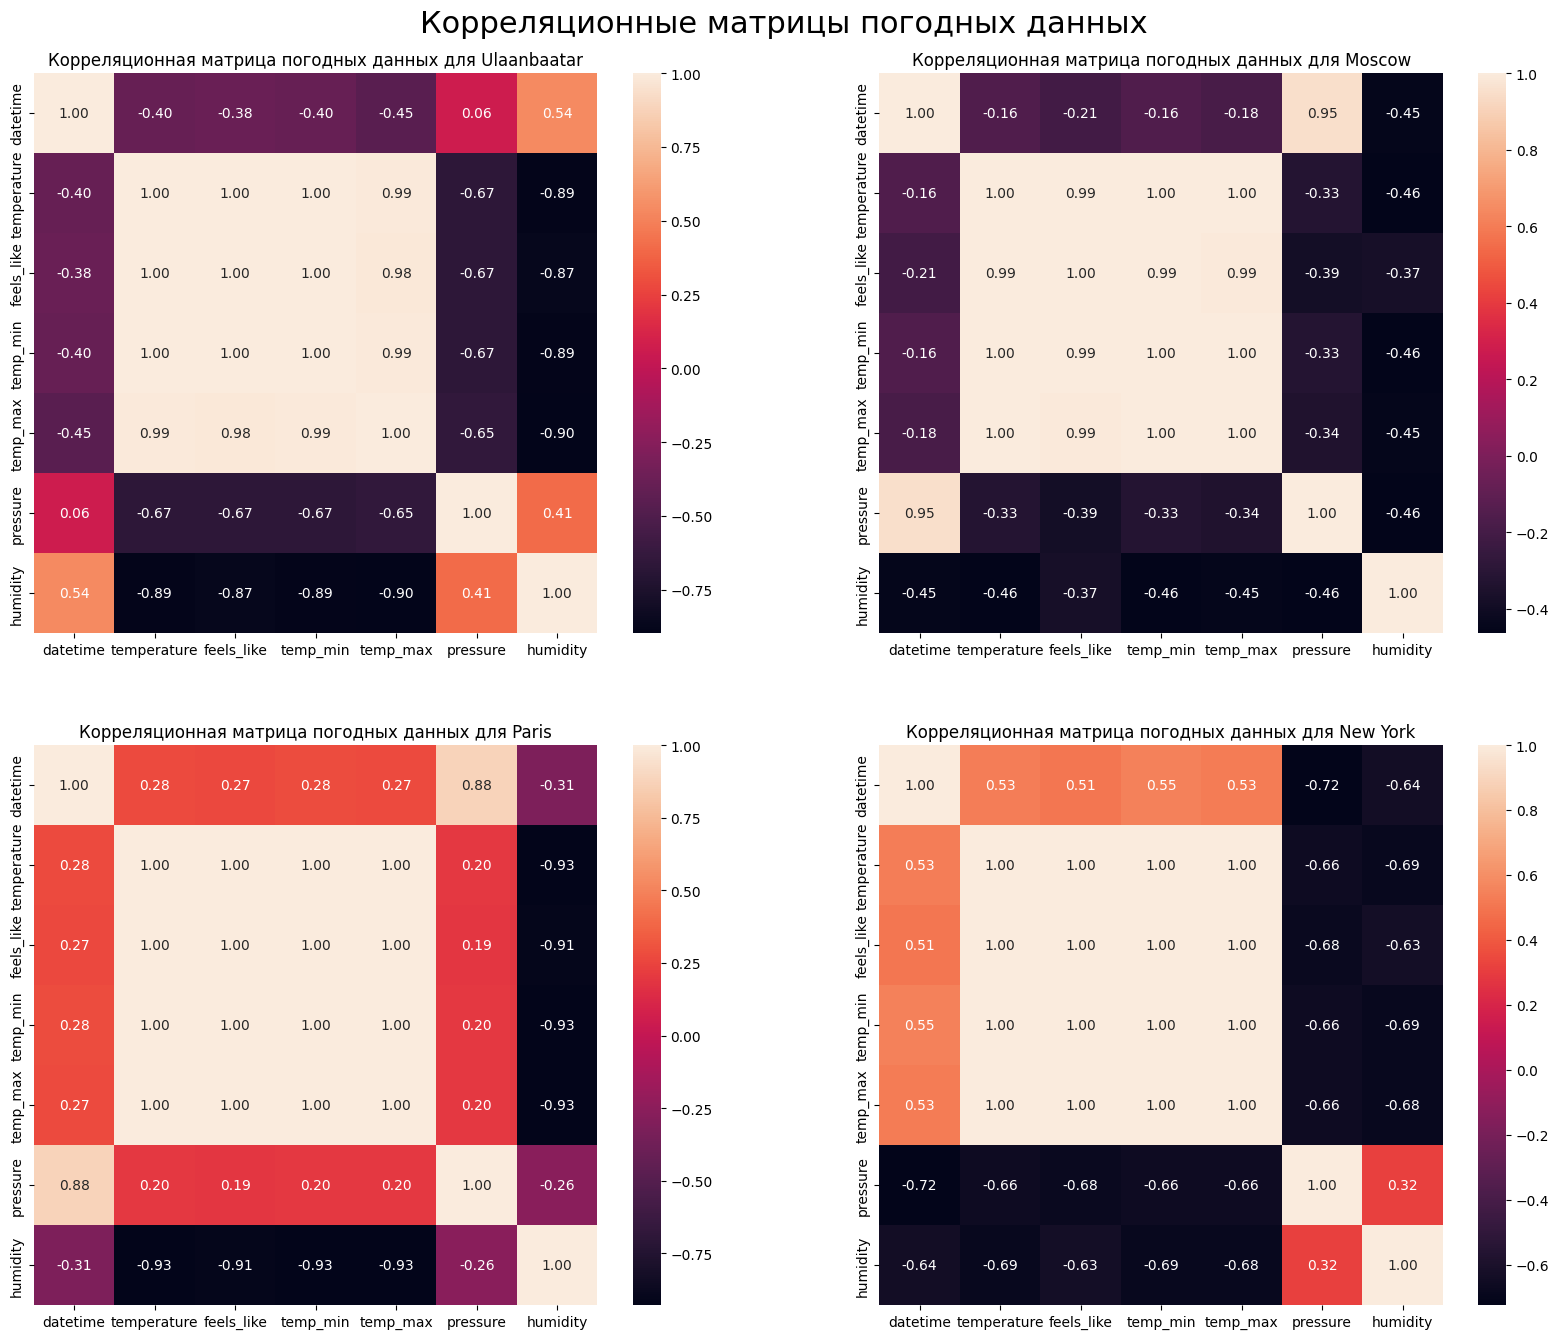

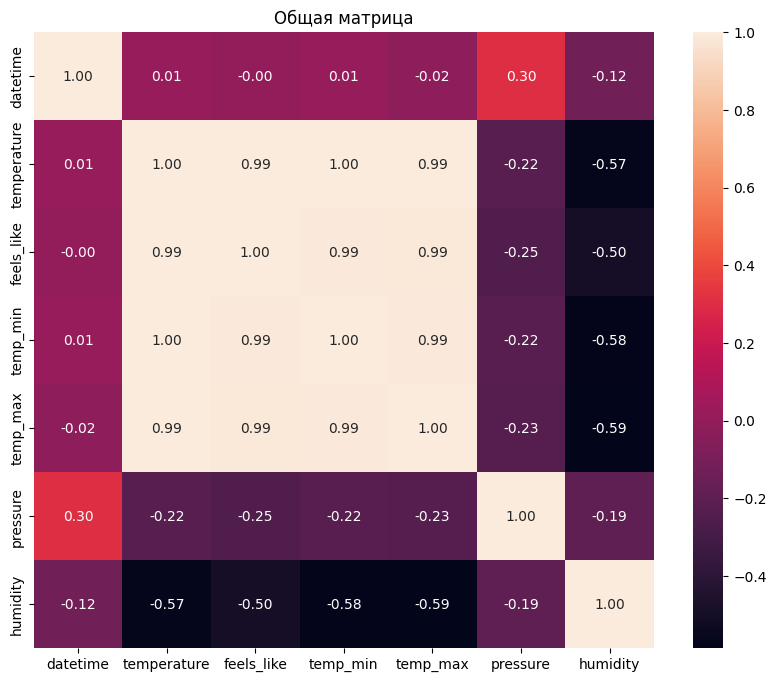

In [200]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Корреляционные матрицы погодных данных', y=0.92, fontsize=22)

sns.heatmap(ax=axes[0, 0], data=weather_data[weather_data['city'] == 'Ulaanbaatar']
 [['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[0, 0].set_title('Корреляционная матрица погодных данных для Ulaanbaatar')

sns.heatmap(ax=axes[0, 1], data=weather_data[weather_data['city'] == 'Moscow']
 [['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[0, 1].set_title('Корреляционная матрица погодных данных для Moscow')

sns.heatmap(ax=axes[1, 0], data=weather_data[weather_data['city'] == 'Paris']
 [['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[1, 0].set_title('Корреляционная матрица погодных данных для Paris')

sns.heatmap(ax=axes[1, 1], data=weather_data[weather_data['city'] == 'New York']
 [['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
axes[1, 1].set_title('Корреляционная матрица погодных данных для New York')

plt.show()
print('\n')

plt.figure(figsize=(10, 8))
sns.heatmap(data=weather_data[['datetime', 'temperature', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity']].corr(), annot=True, fmt=".2f")
plt.title('Общая матрица')

plt.show()

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

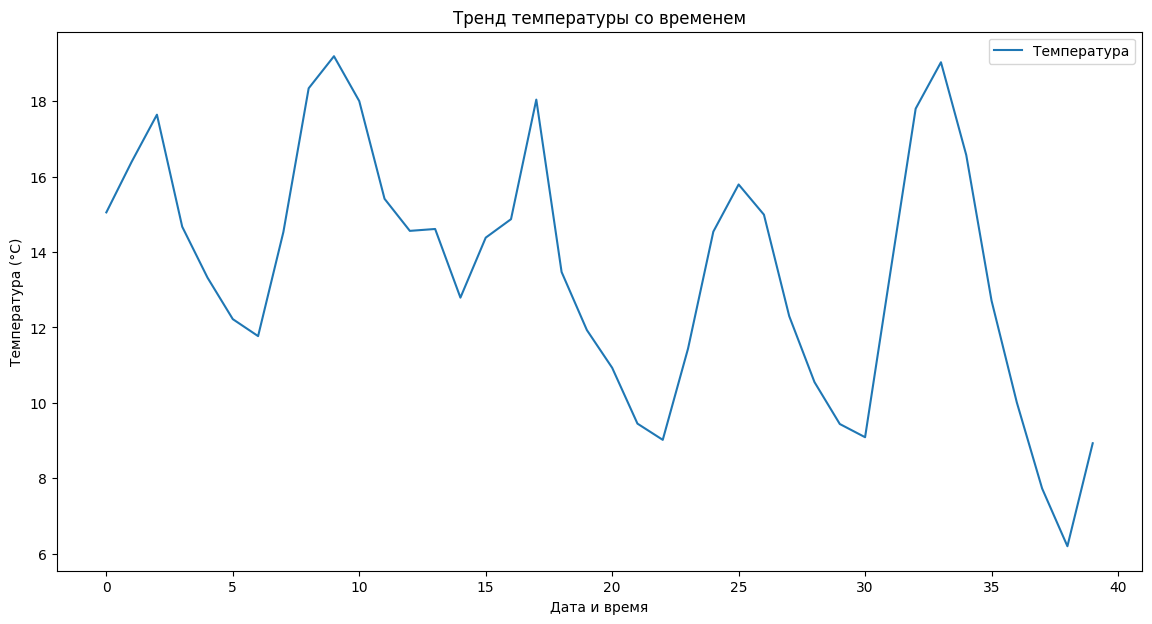

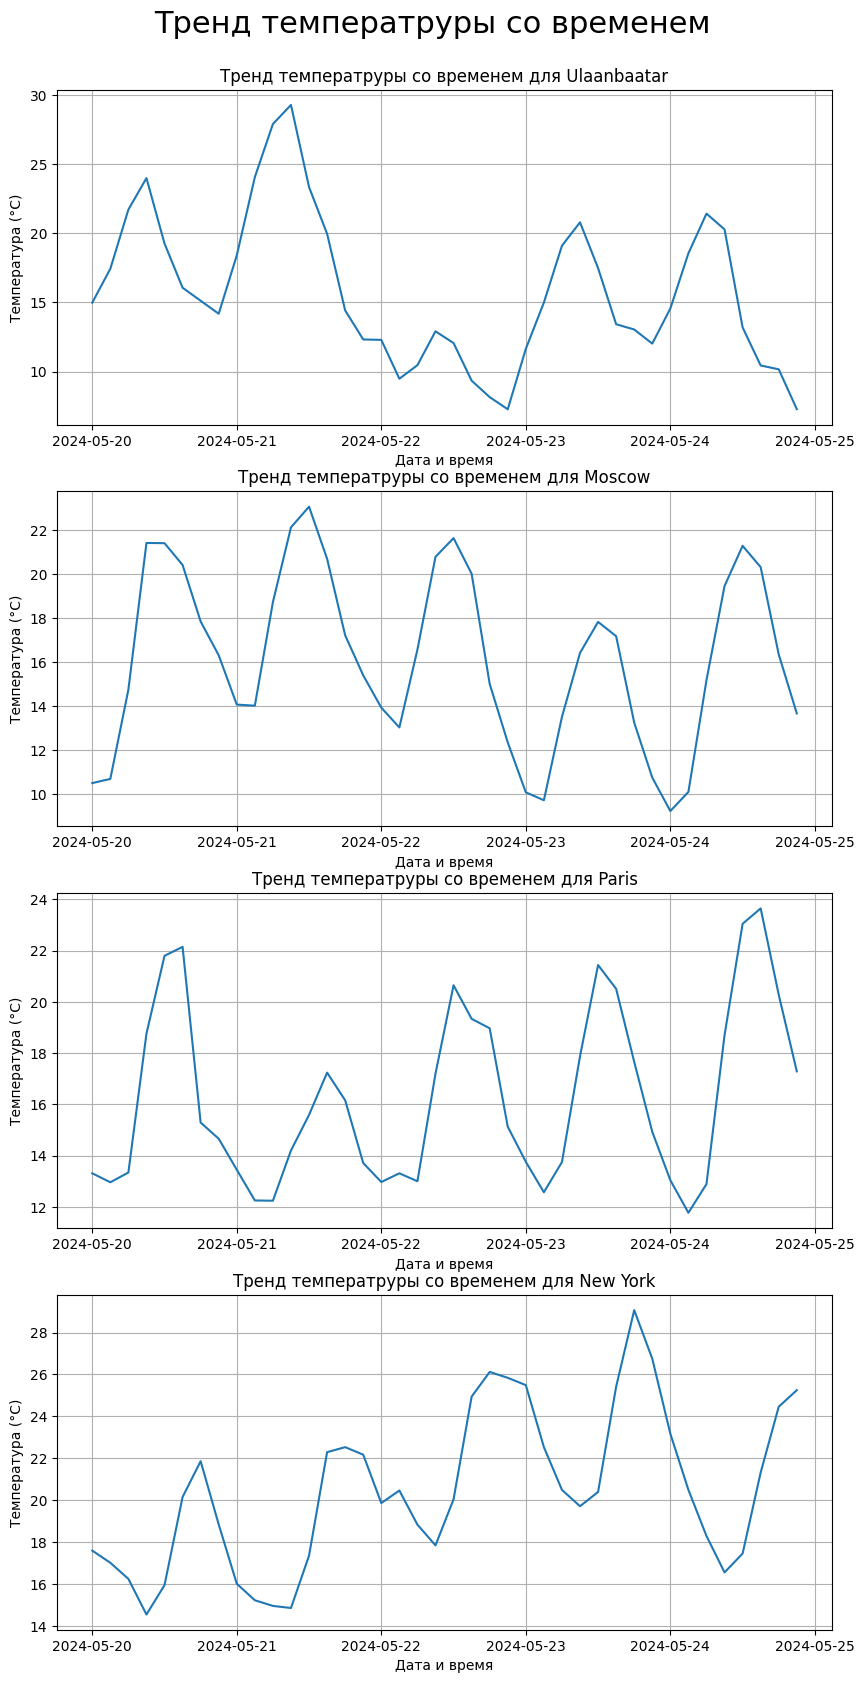

In [207]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Тренд температруры со временем', y=0.92, fontsize=22)

sns.lineplot(ax=axes[0], x=weather_data[weather_data['city'] == 'Ulaanbaatar']['datetime'], y=weather_data[weather_data['city'] == 'Ulaanbaatar']['temperature'])
axes[0].set_title('Тренд температруры со временем для Ulaanbaatar')
axes[0].set_xlabel('Дата и время')
axes[0].set_ylabel('Температура (°C)')
axes[0].grid(True)

sns.lineplot(ax=axes[1], x=weather_data[weather_data['city'] == 'Moscow']['datetime'], y=weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[1].set_title('Тренд температруры со временем для Moscow')
axes[1].set_xlabel('Дата и время')
axes[1].set_ylabel('Температура (°C)')
axes[1].grid(True)

sns.lineplot(ax=axes[2], x=weather_data[weather_data['city'] == 'Paris']['datetime'], y=weather_data[weather_data['city'] == 'Paris']['temperature'])
axes[2].set_title('Тренд температруры со временем для Paris')
axes[2].set_xlabel('Дата и время')
axes[2].set_ylabel('Температура (°C)')
axes[2].grid(True)

sns.lineplot(ax=axes[3], x=weather_data[weather_data['city'] == 'New York']['datetime'], y=weather_data[weather_data['city'] == 'New York']['temperature'])
axes[3].set_title('Тренд температруры со временем для New York')
axes[3].set_xlabel('Дата и время')
axes[3].set_ylabel('Температура (°C)')
axes[3].grid(True)

plt.show()

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

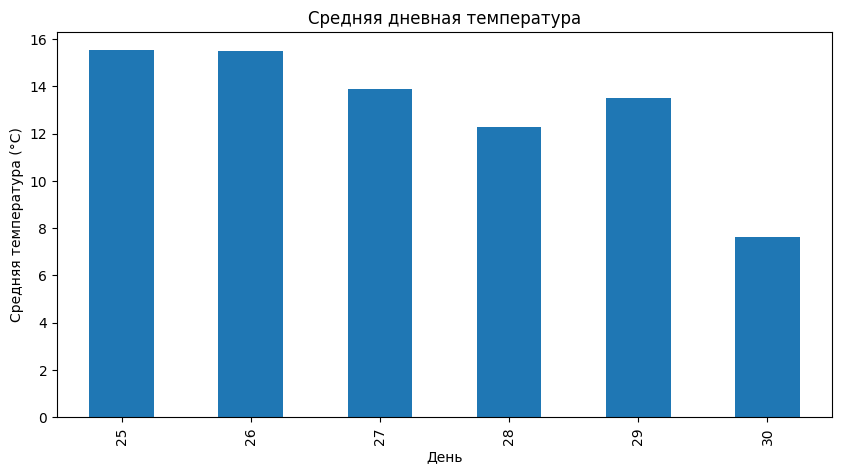

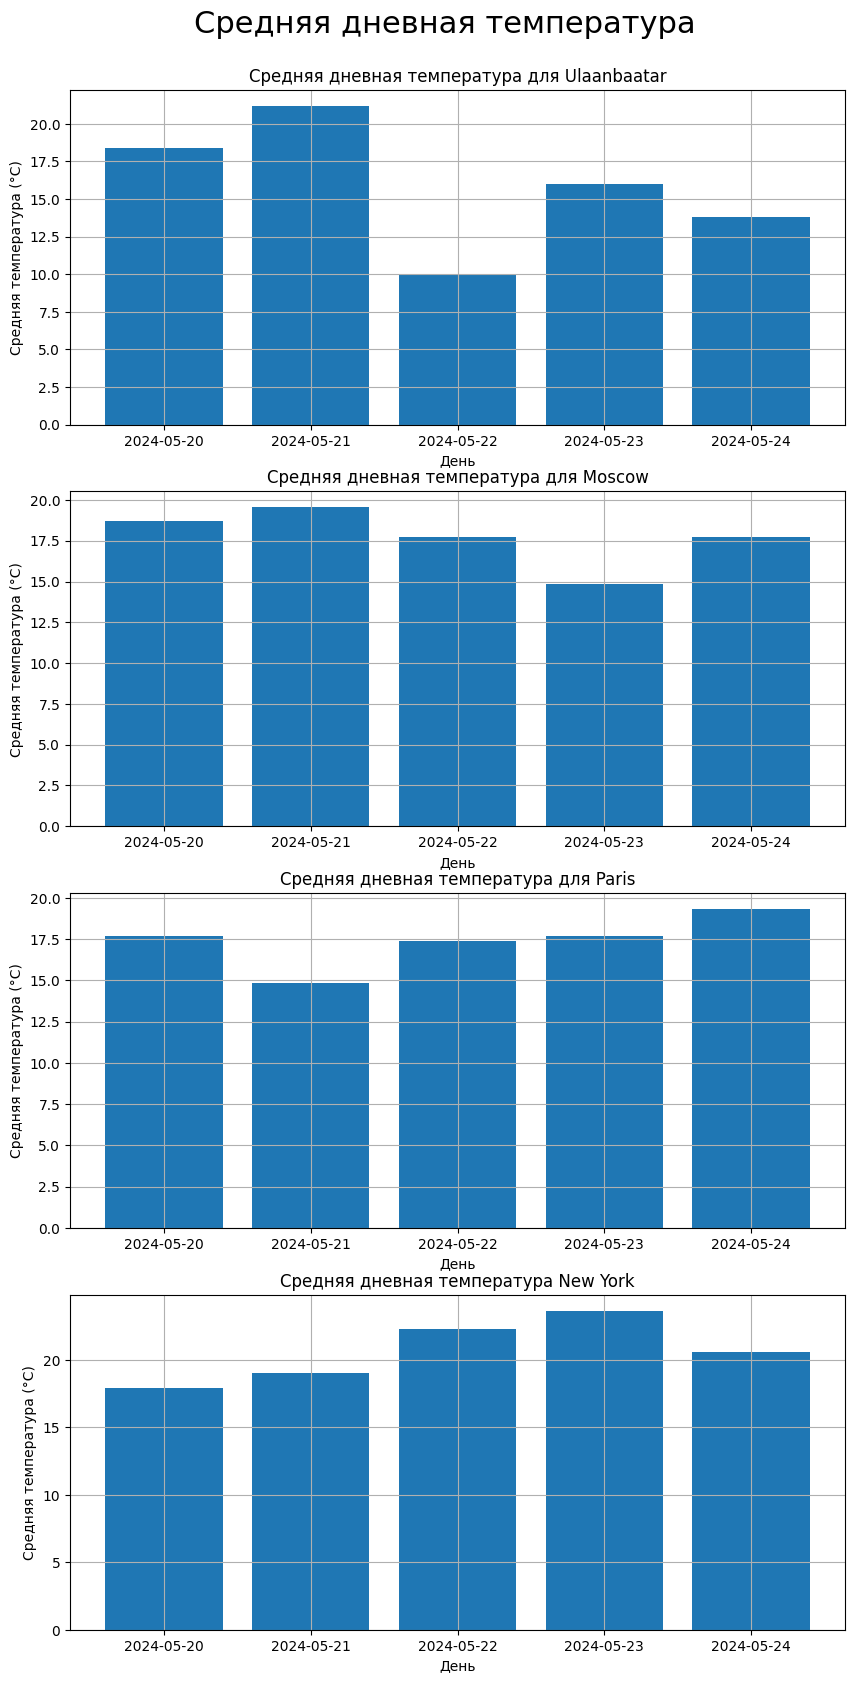

In [209]:
filtered_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour <= 23)]

mean_daily_temperature_per_city = filtered_data.groupby(['city', filtered_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_temp')

fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Средняя дневная температура', y=0.92, fontsize=22)

axes[0].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Ulaanbaatar']
 ['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Ulaanbaatar']['mean_temp'])
axes[0].set_title('Средняя дневная температура для Ulaanbaatar')
axes[0].set_xlabel('День')
axes[0].set_ylabel('Средняя температура (°C)')
axes[0].grid(True)

axes[1].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']
 ['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['mean_temp'])
axes[1].set_title('Средняя дневная температура для Moscow')
axes[1].set_xlabel('День')
axes[1].set_ylabel('Средняя температура (°C)')
axes[1].grid(True)

axes[2].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Paris']
 ['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Paris']['mean_temp'])
axes[2].set_title('Средняя дневная температура для Paris')
axes[2].set_xlabel('День')
axes[2].set_ylabel('Средняя температура (°C)')
axes[2].grid(True)

axes[3].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'New York']
 ['datetime'], mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'New York']['mean_temp'])
axes[3].set_title('Средняя дневная температура New York')
axes[3].set_xlabel('День')
axes[3].set_ylabel('Средняя температура (°C)')
axes[3].grid(True)



plt.show()

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

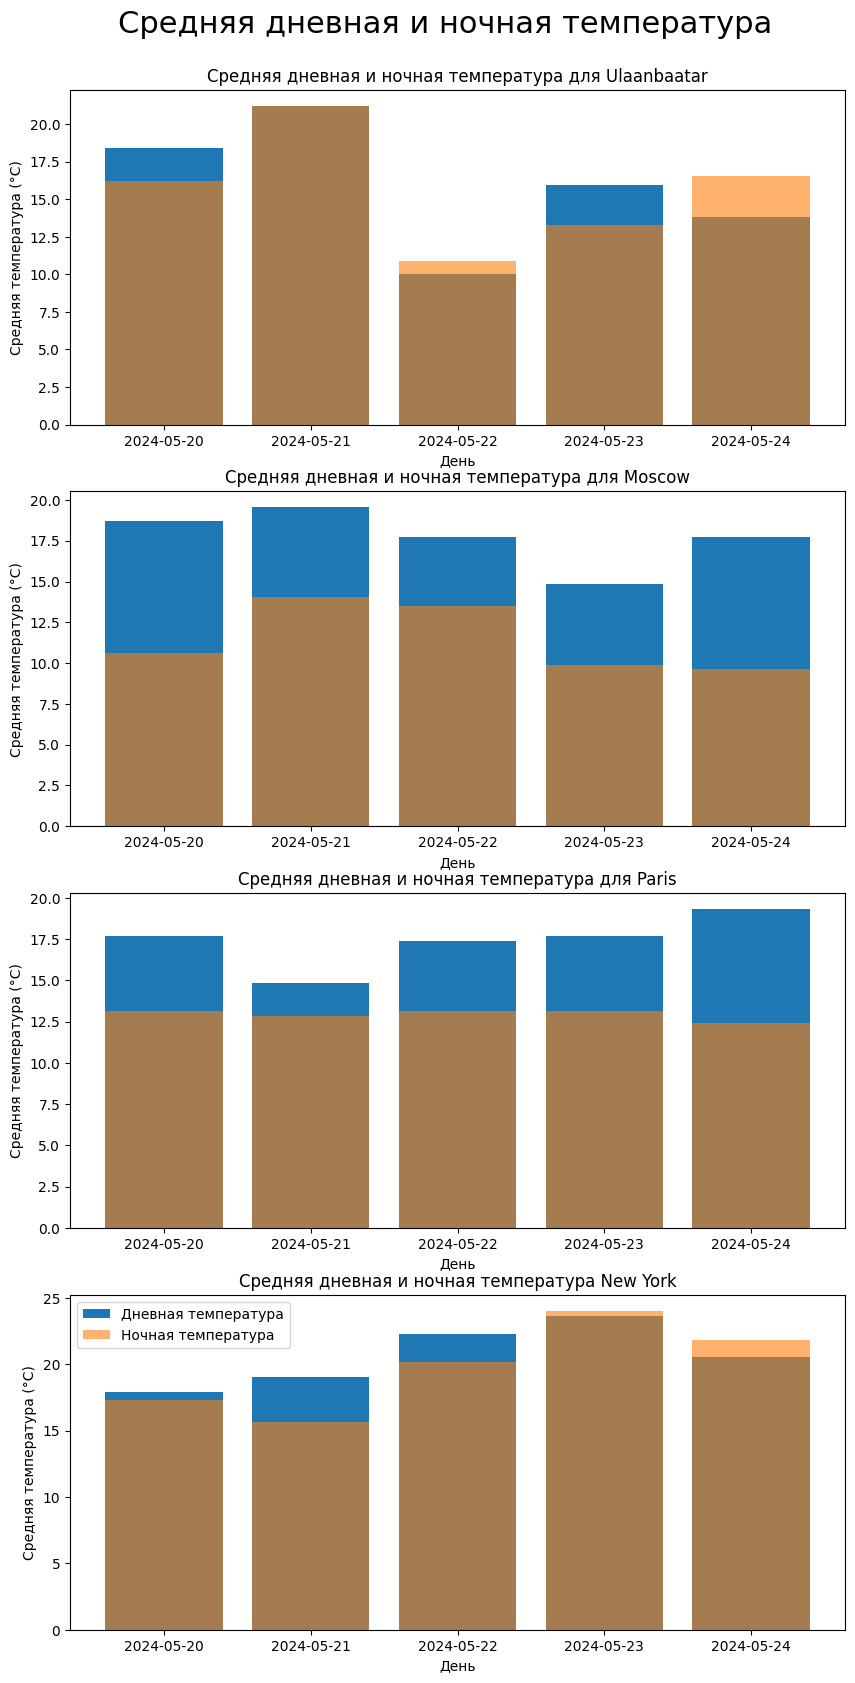

In [212]:
filtered_data = weather_data[(weather_data['datetime'].dt.hour >= 4) & (weather_data['datetime'].dt.hour < 23)]

mean_daily_temperature_per_city = filtered_data.groupby(['city', filtered_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_day_temp')

filtered_data = weather_data[(weather_data['datetime'].dt.hour >= 0) & (weather_data['datetime'].dt.hour <= 3)]

mean_nightly_temperature_per_city = filtered_data.groupby(['city', filtered_data['datetime'].dt.date])['temperature'].mean().reset_index(name='mean_night_temp')

mean_daily_temperature_per_city['mean_night_temp'] = mean_nightly_temperature_per_city['mean_night_temp']

fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Средняя дневная и ночная температура', y=0.92, fontsize=22)

axes[0].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Ulaanbaatar']['datetime'],
            mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Ulaanbaatar']['mean_day_temp'], label='Дневная температура')
axes[0].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Ulaanbaatar']['datetime'],
            mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Ulaanbaatar']['mean_night_temp'], label='Ночная температура', alpha=0.6)
axes[0].set_title('Средняя дневная и ночная температура для Ulaanbaatar')
axes[0].set_xlabel('День')
axes[0].set_ylabel('Средняя температура (°C)')

axes[1].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['datetime'],
            mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['mean_day_temp'], label='Дневная температура')
axes[1].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['datetime'],
            mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Moscow']['mean_night_temp'], label='Ночная температура', alpha=0.6)
axes[1].set_title('Средняя дневная и ночная температура для Moscow')
axes[1].set_xlabel('День')
axes[1].set_ylabel('Средняя температура (°C)')

axes[2].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Paris']['datetime'],
            mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Paris']['mean_day_temp'], label='Дневная температура')
axes[2].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Paris']['datetime'],
            mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'Paris']['mean_night_temp'], label='Ночная температура', alpha=0.6)
axes[2].set_title('Средняя дневная и ночная температура для Paris')
axes[2].set_xlabel('День')
axes[2].set_ylabel('Средняя температура (°C)')

axes[3].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'New York']['datetime'],
            mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'New York']['mean_day_temp'], label='Дневная температура')
axes[3].bar(mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'New York']['datetime'],
            mean_daily_temperature_per_city[mean_daily_temperature_per_city['city'] == 'New York']['mean_night_temp'], label='Ночная температура', alpha=0.6)
axes[3].set_title('Средняя дневная и ночная температура New York')
axes[3].set_xlabel('День')
axes[3].set_ylabel('Средняя температура (°C)')

plt.legend()
plt.show()

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

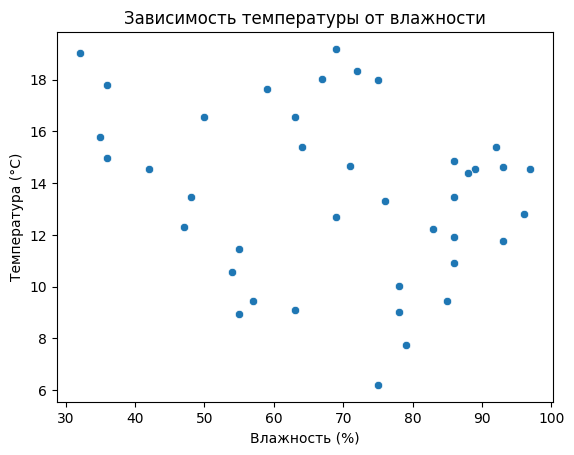

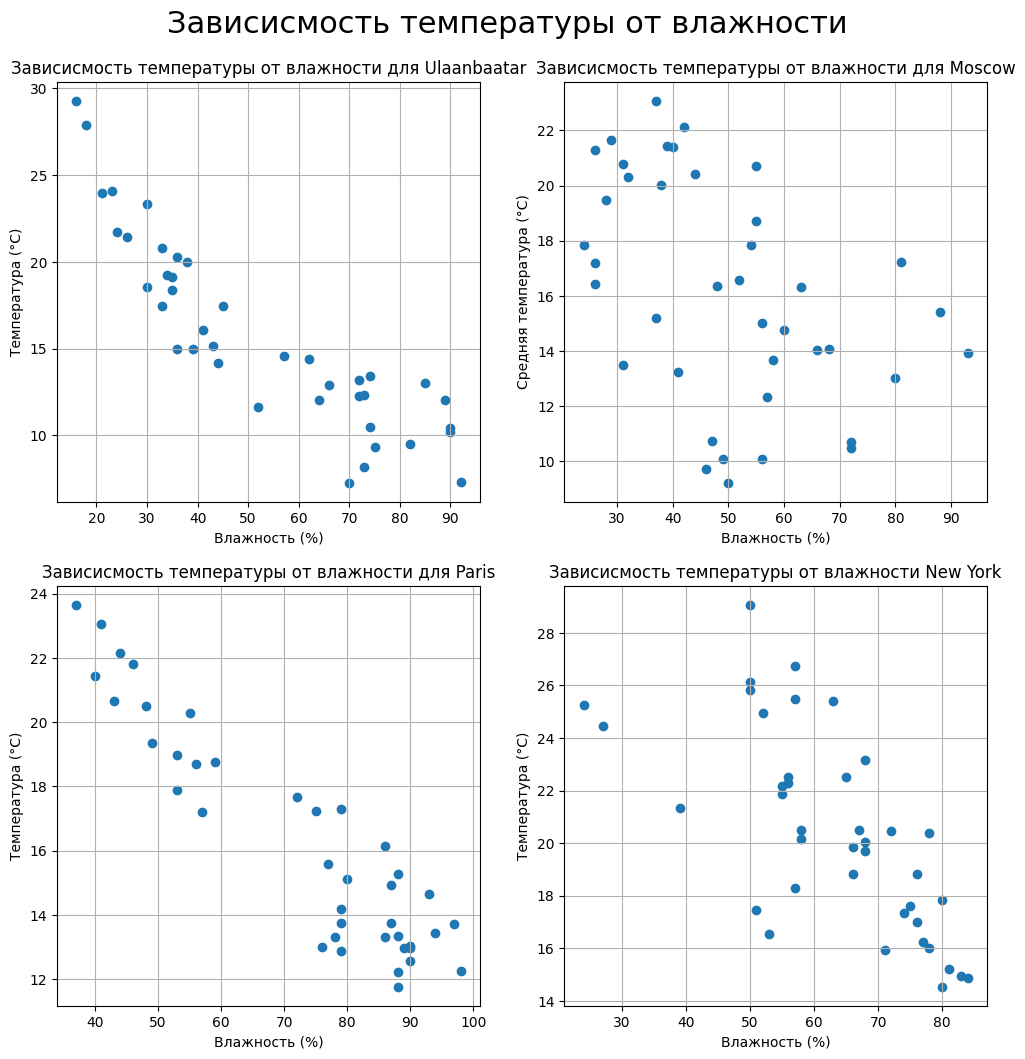

In [213]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Зависисмость температуры от влажности', y=0.94, fontsize=22)

axes[0, 0].scatter(weather_data[weather_data['city'] == 'Ulaanbaatar']['humidity'], weather_data[weather_data['city'] == 'Ulaanbaatar']['temperature'])
axes[0, 0].set_title('Зависисмость температуры от влажности для Ulaanbaatar')
axes[0, 0].set_xlabel('Влажность (%)')
axes[0, 0].set_ylabel('Температура (°C)')
axes[0, 0].grid(True)

axes[0, 1].scatter(weather_data[weather_data['city'] == 'Moscow']['humidity'], weather_data[weather_data['city'] == 'Moscow']['temperature'])
axes[0, 1].set_title('Зависисмость температуры от влажности для Moscow')
axes[0, 1].set_xlabel('Влажность (%)')
axes[0, 1].set_ylabel('Средняя температура (°C)')
axes[0, 1].grid(True)

axes[1, 0].scatter(weather_data[weather_data['city'] == 'Paris']['humidity'], weather_data[weather_data['city'] == 'Paris']['temperature'])
axes[1, 0].set_title('Зависисмость температуры от влажности для Paris')
axes[1, 0].set_xlabel('Влажность (%)')
axes[1, 0].set_ylabel('Температура (°C)')
axes[1, 0].grid(True)


axes[1, 1].scatter(weather_data[weather_data['city'] == 'New York']['humidity'], weather_data[weather_data['city'] == 'New York']['temperature'])
axes[1, 1].set_title('Зависисмость температуры от влажности New York')
axes[1, 1].set_xlabel('Влажность (%)')
axes[1, 1].set_ylabel('Температура (°C)')
axes[1, 1].grid(True)


plt.show()

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

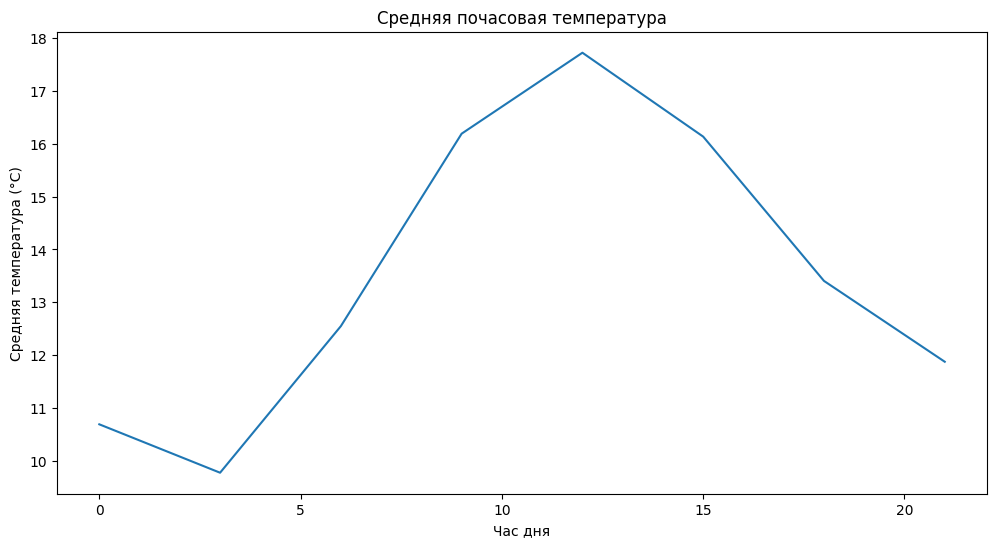

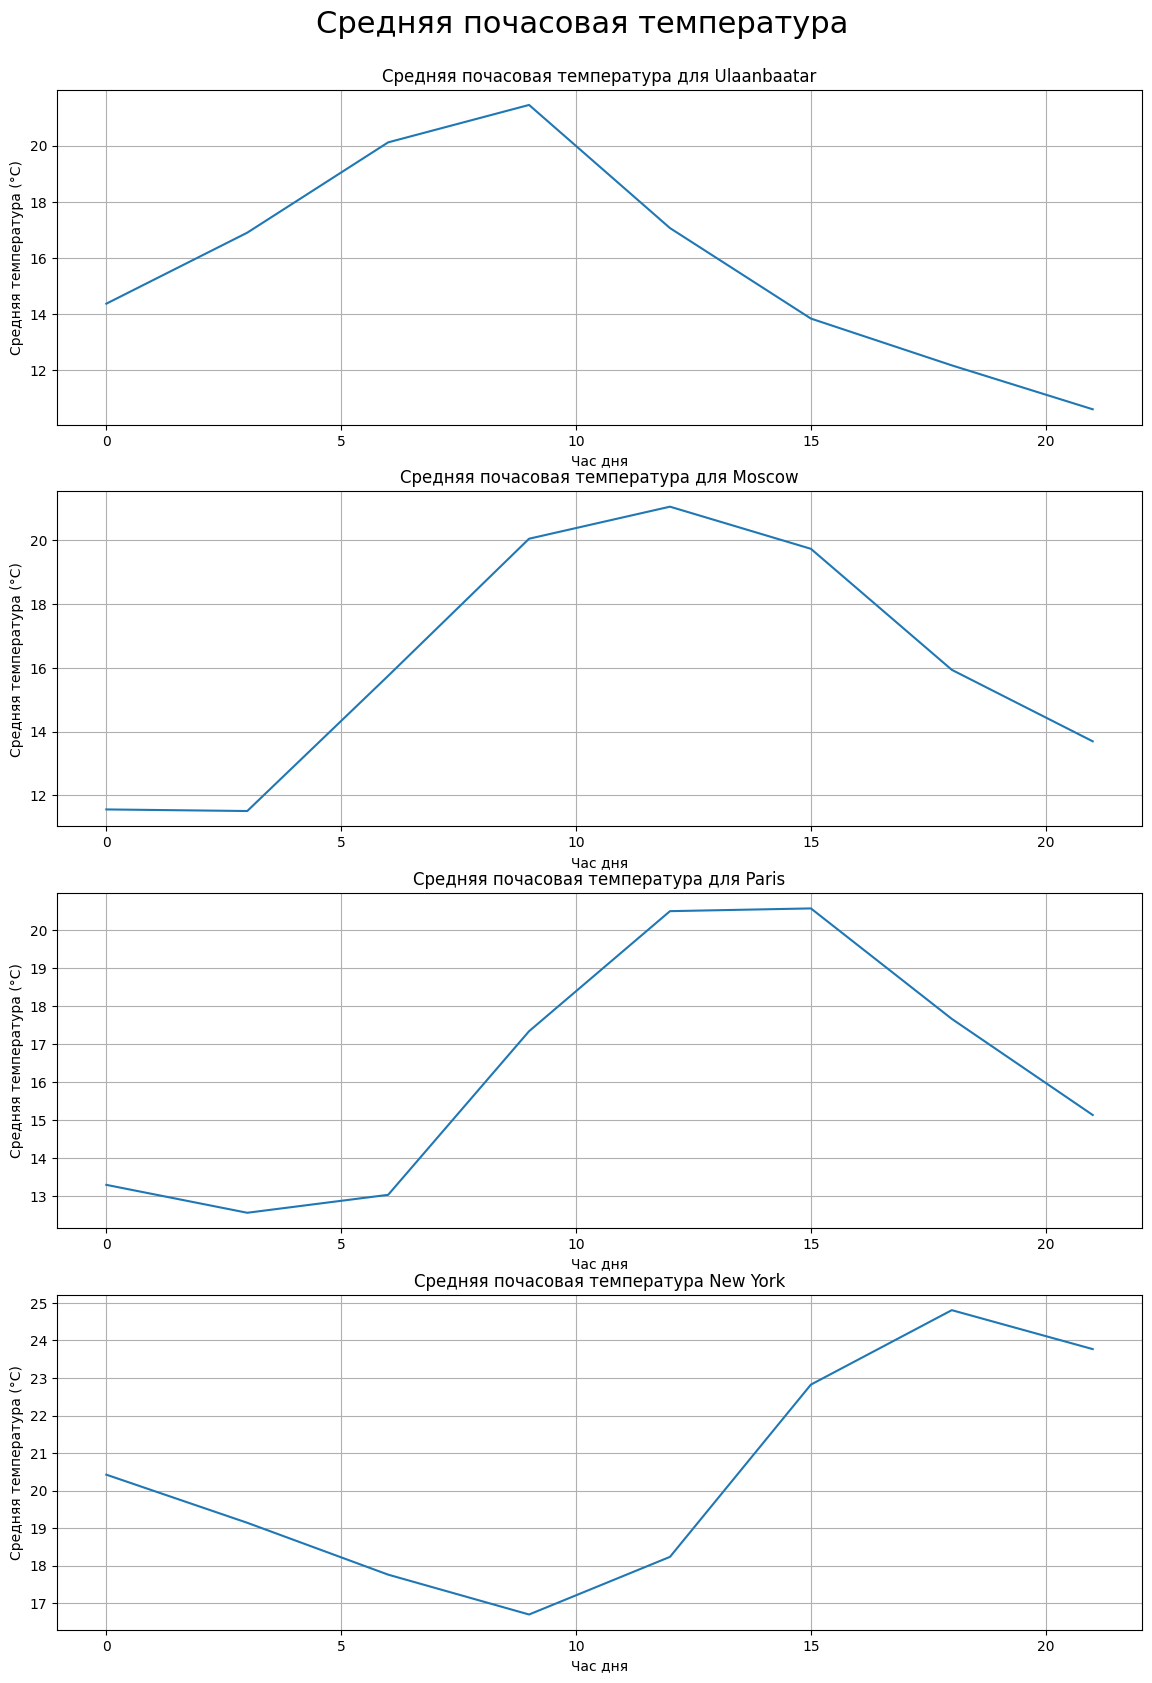

In [215]:
hourly_mean_temperature = weather_data.groupby([weather_data['city'], weather_data['datetime'].dt.hour])['temperature'].mean().reset_index()
hourly_mean_temperature.columns = ['city', 'hour', 'mean_temperature']

fig, axes = plt.subplots(4, 1, figsize=(14, 20))
fig.suptitle('Средняя почасовая температура', y=0.92, fontsize=22)

axes[0].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Ulaanbaatar']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Ulaanbaatar']['mean_temperature'])
axes[0].set_title('Средняя почасовая температура для Ulaanbaatar')
axes[0].set_xlabel('Час дня')
axes[0].set_ylabel('Средняя температура (°C)')
axes[0].grid(True)


axes[1].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Moscow']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Moscow']['mean_temperature'])
axes[1].set_title('Средняя почасовая температура для Moscow')
axes[1].set_xlabel('Час дня')
axes[1].set_ylabel('Средняя температура (°C)')
axes[1].grid(True)


axes[2].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'Paris']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'Paris']['mean_temperature'])
axes[2].set_title('Средняя почасовая температура для Paris')
axes[2].set_xlabel('Час дня')
axes[2].set_ylabel('Средняя температура (°C)')
axes[2].grid(True)


axes[3].plot(hourly_mean_temperature[hourly_mean_temperature['city'] == 'New York']['hour'], hourly_mean_temperature[hourly_mean_temperature['city'] == 'New York']['mean_temperature'])
axes[3].set_title('Средняя почасовая температура New York')
axes[3].set_xlabel('Час дня')
axes[3].set_ylabel('Средняя температура (°C)')
axes[3].grid(True)


plt.show()

# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

In [222]:
import numpy as np

class LinearRegression:
  def __init__(self):
    self.theta = None

  def fit(self, X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

  def predict(self, X):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(self.theta)

  def score(self, X, y):
    y_pred = self.predict(X)
    SSres = np.sum((y - y_pred) ** 2)
    SStot = np.sum((y - np.mean(y)) ** 2)
    return 1 - SSres / SStot

model = LinearRegression()

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([2, 3, 5])

model.fit(X, y)
y_pred = model.predict(X)
r_squared = model.score(X, y)

print("Коэффициенты линейной регрессии: ", model.theta)
print("Предсказание: ", y_pred)
print("Коэффициент детерминации R^2: ", r_squared)

Коэффициенты линейной регрессии:  [0.47222222 0.13888889 0.61111111]
Предсказание:  [1.83333333 3.33333333 4.83333333]
Коэффициент детерминации R^2:  0.9642857142857143


### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

In [223]:
from sklearn.model_selection import train_test_split

params = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
y_pred = []
models = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  y = weather_data[param]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred.append(model.predict(X_test))
  score = model.score(X_test, y_test)
  scores.append(score)
  models.append(model)

Выведите оценку точности:

In [224]:
for i, param in enumerate(params):
    print(f"Коэффициент детерминации (R^2) для {param}: {scores[i]}")

Коэффициент детерминации (R^2) для temperature: 0.9999434577006641
Коэффициент детерминации (R^2) для feels_like: 0.999081919399583
Коэффициент детерминации (R^2) для temp_min: 0.9999514119749703
Коэффициент детерминации (R^2) для temp_max: 0.9987065584658483
Коэффициент детерминации (R^2) для humidity: 0.9107062026348111
Коэффициент детерминации (R^2) для pressure: 0.1604035255211037


In [225]:
pred_data = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = weather_data[new_params]
  pred_data.append(models[i].predict(X))

pred_weather = pd.DataFrame()
pred_weather['temperature'] = pred_data[0]
pred_weather['feels_like'] = pred_data[1]
pred_weather['temp_min'] = pred_data[2]
pred_weather['temp_max'] = pred_data[3]
pred_weather['humidity'] = pred_data[4]
pred_weather['pressure'] = pred_data[5]
pred_weather

,temperature,feels_like,temp_min,temp_max,humidity,pressure
0,15.028175,13.489125,14.993733,15.421298,43.269445,1017.827995
1,17.620046,16.091757,17.436008,17.849012,31.821353,1010.033964
2,21.835512,20.503532,21.724568,22.129315,27.642867,1011.483061
3,23.972926,22.887699,24.012783,24.391685,33.218521,1017.196387
4,19.244955,18.087745,19.272586,19.619036,43.765197,1018.548057
...,...,...,...,...,...,...
155,16.550123,15.645384,16.540172,16.754523,56.353667,1017.357897
156,17.450959,16.581110,17.440094,17.630542,53.864678,1017.028698
157,21.319244,20.488840,21.318104,21.504912,43.246559,1016.177139
158,24.453851,23.594322,24.468494,24.687046,33.580367,1015.851913


### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

In [226]:
params = ['temperature', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure']
scores = []
y_pred = []
models = []
for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X_train = weather_data[new_params] # За предыдущие дни
  y_train = weather_data[param] # За предыдущие дни
  X_test = pred_weather[new_params] # За будующие дни
  y_test = pred_weather[param] # За будующие дни

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred.append(model.predict(X_test))
  score = model.score(X_test, y_test)
  scores.append(score)
  models.append(model)

future_pred_weather = pd.DataFrame()
start_date = weather_data['datetime'].max().date()
time_offsets = pd.date_range(start='00:00', end='21:00', freq='3H').time
datetime_list = []
num_days = 5
for day in range(num_days):
  current_date = start_date + pd.Timedelta(days=day)
  for time in time_offsets:
    datetime_list.append(pd.Timestamp.combine(current_date, time))
datetime_list = datetime_list * 4

future_pred_weather['city'] = weather_data['city']
future_pred_weather['country'] = weather_data['country']
future_pred_weather['latitude'] = weather_data['latitude']
future_pred_weather['longitude'] = weather_data['longitude']
future_pred_weather['datetime'] = datetime_list
future_pred_weather['temperature'] = y_pred[0]
future_pred_weather['feels_like'] = y_pred[1]
future_pred_weather['temp_min'] = y_pred[2]
future_pred_weather['temp_max'] = y_pred[3]
future_pred_weather['humidity'] = y_pred[4]
future_pred_weather['pressure'] = y_pred[5]
future_pred_weather['description'] = weather_data['description']

Выведите оценку точности:

In [227]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 0.9994042501146715 for temperature
Score of the model: 0.9964401699221386 for feels_like
Score of the model: 0.9994964201012684 for temp_min
Score of the model: 0.9984990057537217 for temp_max
Score of the model: 0.7617287665296106 for humidity
Score of the model: 0.22348582338088008 for pressure


### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

In [228]:
print(new_weather_data.columns)
print(new_weather_data.dtypes)

Index(['city', 'datetime', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity'],
      dtype='object')
city                  object
datetime      datetime64[ns]
temp                 float64
feels_like           float64
temp_min             float64
temp_max             float64
pressure               int64
humidity               int64
dtype: object


##### Пример визуализации:

In [230]:
import plotly.express as px

new_weather_data = pd.concat([weather_data, future_pred_weather], ignore_index=True)

fig = px.scatter_mapbox(new_weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=new_weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Прогноз погоды с предсказанием")  # Заголовок графика

fig.show()

## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [231]:
px.choropleth(
  gapminder, # набор данных
  locations="iso_alpha", # отображение с помощью цвета color
  color="lifeExp", # выбор поля для цвета
  hover_name="country", # hover_field_name
  animation_frame="year", # аннотация
  color_continuous_scale=px.colors.sequential.Plasma, # изменение цвета
  projection="natural earth" # параметр проекции: глобальная карта
             )

NameError: name 'gapminder' is not defined

In [233]:
import pandas as pd
import requests
import json
import plotly.express as px

countries = ['Mongolia', 'Russia', 'China', 'USA', 'France', 'Norway', 'Germany']
weather_data = {}
for country in countries:
    api_key = API_KEY
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={country}&appid={API_KEY}&cnt=32'
    response = requests.get(url)
    data = json.loads(response.text)
    weather_data[country] = data['list']
df_weather = pd.DataFrame()
for country, data in weather_data.items():
    temp_df = pd.DataFrame([{
        'country': country,
        'datetime': pd.to_datetime(item['dt_txt']),
        'temperature': item['main']['temp'] - 273.15,
        'humidity': item['main']['humidity'],
        'pressure': item['main']['pressure'],
        'description': item['weather'][0]['description']
    } for item in data])
    df_weather = pd.concat([df_weather, temp_df], ignore_index=True)

df_weather

,country,datetime,temperature,humidity,pressure,description
0,Mongolia,2024-05-20 03:00:00,20.15,18,1010,overcast clouds
1,Mongolia,2024-05-20 06:00:00,24.05,15,1009,broken clouds
2,Mongolia,2024-05-20 09:00:00,26.26,17,1008,clear sky
3,Mongolia,2024-05-20 12:00:00,23.38,21,1010,clear sky
4,Mongolia,2024-05-20 15:00:00,20.06,27,1012,few clouds
...,...,...,...,...,...,...
219,Germany,2024-05-23 12:00:00,17.27,71,1015,light rain
220,Germany,2024-05-23 15:00:00,17.90,71,1014,light rain
221,Germany,2024-05-23 18:00:00,15.59,87,1015,light rain
222,Germany,2024-05-23 21:00:00,11.58,92,1017,clear sky


In [234]:
params = ['temperature', 'humidity', 'pressure']
scores = []
y_pred = []
models = []

for i in range(len(params)):
  param = params[i]
  new_params = params[:i] + params[i+1:]
  X = df_weather[new_params]
  y = df_weather[param]

  model = LinearRegression()
  model.fit(X, y)
  y_pred.append(model.predict(X))
  score = model.score(X, y)
  scores.append(score)
  models.append(model)

pred_weather = pd.DataFrame()
start_date = df_weather['datetime'].max().date()
time_offsets = pd.date_range(start='00:00', end='21:00', freq='3H').time
datetime_list = []
num_days = 5
for day in range(num_days):
  current_date = start_date + pd.Timedelta(days=day)
  for time in time_offsets:
    datetime_list.append(pd.Timestamp.combine(current_date, time))
datetime_list = datetime_list * 7

pred_weather['country'] = df_weather['country']
pred_weather['datetime'] = datetime_list[:224]
pred_weather['temperature'] = y_pred[0]
pred_weather['humidity'] = y_pred[1]
pred_weather['pressure'] = y_pred[2]
pred_weather['description'] = df_weather['description']
pred_weather

,country,datetime,temperature,humidity,pressure,description
0,Mongolia,2024-05-24 00:00:00,24.756397,66.365969,1010.504610,overcast clouds
1,Mongolia,2024-05-24 03:00:00,25.602022,62.873059,1009.567059,broken clouds
2,Mongolia,2024-05-24 06:00:00,26.031115,60.697197,1009.103909,clear sky
3,Mongolia,2024-05-24 09:00:00,24.506478,63.848773,1009.829116,clear sky
4,Mongolia,2024-05-24 12:00:00,22.815227,67.343248,1010.690692,few clouds
...,...,...,...,...,...,...
219,Germany,2024-05-26 09:00:00,17.362623,70.878256,1012.132075,light rain
220,Germany,2024-05-26 12:00:00,17.958329,69.933715,1011.989547,light rain
221,Germany,2024-05-26 15:00:00,16.029719,72.187510,1012.806762,light rain
222,Germany,2024-05-26 18:00:00,14.421775,76.219714,1013.806026,clear sky


In [235]:
new_df_weather = pd.concat([df_weather, pred_weather], ignore_index=True)

fig = px.choropleth(
    new_df_weather,
    locations='country',
    locationmode='country names',
    color='temperature',
    hover_data=['humidity', 'pressure', 'description'],
    animation_frame='datetime',
    title='Weather forecast'
)

fig.show()

In [236]:
for i in range(len(scores)):
  print(f'Score of the model: {scores[i]} for {params[i]}')

Score of the model: 0.2186133743426334 for temperature
Score of the model: 0.10444682971023755 for humidity
Score of the model: 0.1713409515417389 for pressure


# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1WsEyJxvQ52W5nB3XN7HEfeHI8sgDPDMr?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм

In [237]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00


In [238]:
!pip install statsmodels

In [239]:
import requests
import pandas as pd

cities = ['Ulaanbaatar', 'Moscow', 'Paris', 'New York', 'Beijing']

weather_data = []

for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric'
    response = requests.get(url)
    data = response.json()

    for item in data['list']:
        weather = {
            'city': city,
            'datetime': pd.to_datetime(item['dt_txt']),
            'temperature': item['main']['temp'],
            'humidity': item['main']['humidity'],
            'pressure': item['main']['pressure'],
            'description': item['weather'][0]['description']
        }
        weather_data.append(weather)

weather_df = pd.DataFrame(weather_data)
weather_df

,city,datetime,temperature,humidity,pressure,description
0,Ulaanbaatar,2024-05-20 03:00:00,20.25,27,1010,light rain
1,Ulaanbaatar,2024-05-20 06:00:00,23.00,23,1009,scattered clouds
2,Ulaanbaatar,2024-05-20 09:00:00,24.25,22,1008,clear sky
3,Ulaanbaatar,2024-05-20 12:00:00,19.52,35,1011,clear sky
4,Ulaanbaatar,2024-05-20 15:00:00,16.68,41,1013,broken clouds
...,...,...,...,...,...,...
195,Beijing,2024-05-24 12:00:00,25.38,32,1013,overcast clouds
196,Beijing,2024-05-24 15:00:00,23.10,27,1014,overcast clouds
197,Beijing,2024-05-24 18:00:00,21.37,22,1014,overcast clouds
198,Beijing,2024-05-24 21:00:00,20.37,29,1014,overcast clouds


In [242]:
import pandas as pd
from pmdarima import auto_arima
import requests
from statsmodels.tsa.arima.model import ARIMA

weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

def forecast_arima(data, city):
    data_city = data[data['city'] == city]['temperature']
    model = auto_arima(data_city, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                       d=None, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    model_fit = model.fit(data_city)
    forecast = model_fit.predict(n_periods=24)
    return forecast

combined_data = pd.DataFrame(columns=['datetime', 'city', 'temperature', 'humidity', 'pressure', 'description'])
cities = weather_df['city'].unique()

for city in cities:
    city_data = weather_df[weather_df['city'] == city].reset_index(drop=True)
    city_forecast = forecast_arima(weather_df, city)
    start_date = city_data['datetime'].max()
    forecast_data = pd.DataFrame({
        'datetime': pd.date_range(start=start_date, periods=len(city_forecast), freq='H'),
        'city': city,
        'temperature': city_forecast,
        'humidity': None,
        'pressure': None,
    })
    combined_data = pd.concat([combined_data, city_data, forecast_data]).reset_index(drop=True)

combined_data.set_index('datetime', inplace=True)

combined_data

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=204.449, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=156.994, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=207.441, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=174.818, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=158.630, Time=1.21 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=160.743, Time=1.55 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=152.964, Time=0.21 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=161.814, Time=0.07 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.78

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=172.289, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=170.296, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=140.947, Time=0.27 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=142.947, Time=0.47 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=144.947, Time=0.69 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=131.748, Time=0.31 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.47 sec
 AR

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=181.344, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=184.023, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=159.325, Time=0.04 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=130.595, Time=0.07 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=114.811, Time=0.21 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=115.986, Time=0.55 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=115.978, Time=0.38 sec

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=207.169, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=205.333, Time=0.05 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=183.420, Time=0.66 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=185.420, Time=0.87 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=183.420, Time=0.39 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=187.420, Time=0.57 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=166.048, Time=0.27 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.50 sec

KeyboardInterrupt: 

In [246]:
import requests

def get_coordinates(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'
    response = requests.get(url)
    data = response.json()
    if 'coord' in data:
        latitude = data['coord']['lat']
        longitude = data['coord']['lon']
        return latitude, longitude
    else:
        return None, None

combined_data['latitude'] = None
combined_data['longitude'] = None

cities = ['Ulaanbaatar', 'Moscow', 'Paris', 'New York', 'Beijing']

for city in cities:
    latitude, longitude = get_coordinates(city)
    if latitude is not None and longitude is not None:
        combined_data.loc[combined_data['city'] == city, ['latitude', 'longitude']] = latitude, longitude

combined_data.reset_index(inplace=True)

fig = px.scatter_mapbox(combined_data,
                        lat="latitude",
                        lon="longitude",
                        color="temperature",
                        hover_name="city",
                        hover_data=["temperature"],
                        animation_frame="datetime",
                        zoom=3,
                        range_color=[combined_data['temperature'].min(), combined_data['temperature'].max()],
                        mapbox_style="carto-positron",
                        size="temperature"
                        )

fig.show()

ValueError: cannot insert level_0, already exists